# **MACHINE LEARNING - PROJECT 2**






---



---



## **Given the features and the target, build a Machine Learning Regression model that can predict the price of the diamond from a given set of features**

”Diamonds are forever”. Diamonds are one of the most expensive jewellery items. Formed by only one element,
they are found in every color of the rainbow. The Diamonds dataset is a classic and a great dataset for beginners
for understanding regression.

### **Importing the necessary libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

### **Importing the dataset**

In [18]:
data = pd.read_csv("/content/drive/MyDrive/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75




---



---



---



### **About the dataset**


*  price price in US dollars ($326–$18,823)
*  carat weight of the diamond (0.2–5.01)
*  cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*  color diamond colour, from J (worst) to D (best)
*  clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF
(best))
*  x length in mm (0–10.74)
*  y width in mm (0–58.9)
*  z depth in mm (0–31.8)
*  depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
*  table width of top of diamond relative to widest point (43–95)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB




---



Describing the dataset

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80




---



Checking for null values

In [21]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [22]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80




---




Checking for categorical values

In [23]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']




---



---


### **Data visualizaton**

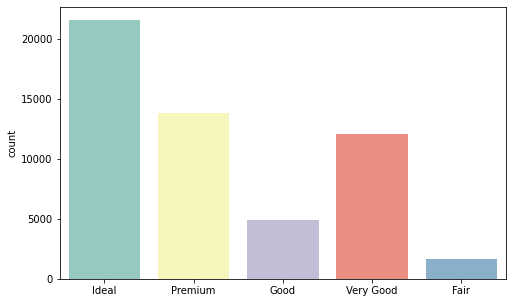

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
-x--x--x--x--x--x--x--x--x--x-


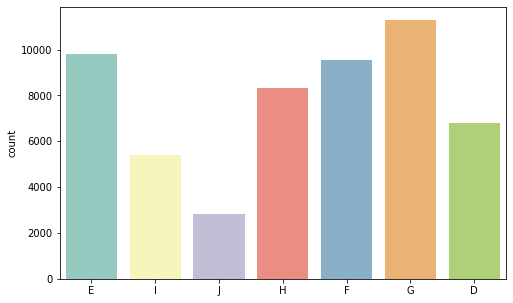

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
-x--x--x--x--x--x--x--x--x--x-


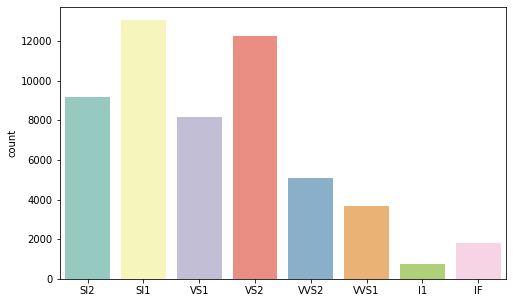

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
-x--x--x--x--x--x--x--x--x--x-


In [24]:
for c in object_cols:
    plt.figure(figsize=(8,5))
    
    sns.countplot(x = data[c].to_numpy(),palette ="Set3")
    plt.show()
    print(data[c] .value_counts())
    print("-x-"*10)

**Plotting a heatmap of the correlation between the features**

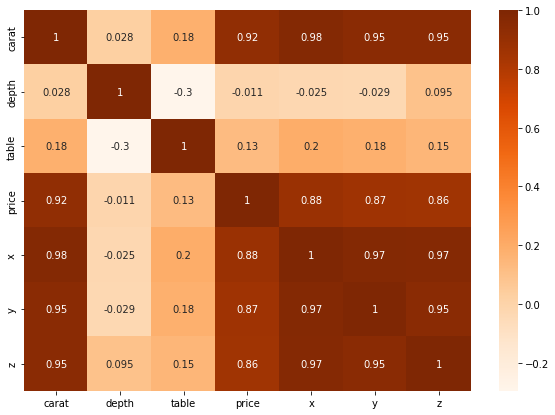

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot=True, cmap="Oranges");

### **Converting the categorical values into numerical**

In [26]:
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
  label_data[col] = label_encoder.fit_transform(label_data[col])

### **Splitting the dataset into train(70%), validation(20%) and test(10%)**

In [27]:
X = label_data.drop("price", axis = 1)
y = label_data["price"]
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, train_size=0.4)

### **Creating pipelines for different models**


*   **Linear Regression** - LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
    
*   **Decision Tree Regressor** - Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 

*   **Random Forest Regressor** - A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.




In [28]:
model1 = Pipeline([("scalar1",StandardScaler()),("lr",LinearRegression())])
model2 = Pipeline([("scalar2",StandardScaler()),("dt",DecisionTreeRegressor())])
model3 = Pipeline([("scalar3",StandardScaler()),("rf",RandomForestRegressor(n_estimators=10))])
model4 = Pipeline([("scalar4",StandardScaler()),("rf",RandomForestRegressor(n_estimators=20))])
model5 = Pipeline([("scalar5",StandardScaler()),("rf",RandomForestRegressor(n_estimators=6))])

pipelines = [model1, model2, model3, model4, model5]
pipe_dict = {0:'Linear Regression',1:'DecisionTree',2:'RandomForest (n=10)',3:'RandomForest (n=20)',4:'RandomForest (n=6)'}


### **Training the models**

In [29]:
for pipe in pipelines:
  pipe.fit(X_train,y_train)

### **Prediction of prices and checking the performance of all the models**

In [32]:
pred1 = model1.predict(X_val)
pred2 = model2.predict(X_val)
pred3 = model3.predict(X_val)
pred4 = model4.predict(X_val)
pred5 = model5.predict(X_val)

print("Linear Regressor")
print("MAE:",mean_absolute_error(y_val,pred1))
print("MSE:",mean_squared_error(y_val,pred1))
print("-x-"*10,"\n")

print("DecisionTree Regressor")
print("MAE:",mean_absolute_error(y_val,pred2))
print("MSE:",mean_squared_error(y_val,pred2))
print("-x-"*10,"\n")

print("RandomForest Regressor (with n=10 (number of nodes))")
print("MAE:",mean_absolute_error(y_val,pred3))
print("MSE:",mean_squared_error(y_val,pred3))
print("-x-"*10,'\n')

print("RandomForest Regressor (with n=20 (number of nodes))")
print("MAE:",mean_absolute_error(y_val,pred4))
print("MSE:",mean_squared_error(y_val,pred4))
print("-x-"*10,'\n')

print("RandomForest Regressor (with n=6 (number of nodes))")
print("MAE:",mean_absolute_error(y_val,pred5))
print("MSE:",mean_squared_error(y_val,pred5))
print("-x-"*10)

Linear Regressor
MAE: 862.8251907320047
MSE: 1756660.5485034168
-x--x--x--x--x--x--x--x--x--x- 

DecisionTree Regressor
MAE: 374.5604016477858
MSE: 592268.5243820803
-x--x--x--x--x--x--x--x--x--x- 

RandomForest Regressor (with n=10 (number of nodes))
MAE: 289.4406292236771
MSE: 335712.8522149795
-x--x--x--x--x--x--x--x--x--x- 

RandomForest Regressor (with n=20 (number of nodes))
MAE: 282.3422214702565
MSE: 323905.008148475
-x--x--x--x--x--x--x--x--x--x- 

RandomForest Regressor (with n=6 (number of nodes))
MAE: 302.1940528092459
MSE: 374642.3832891707
-x--x--x--x--x--x--x--x--x--x-


From the values of Mean Absolute Error and Mean Squared Error we see that Random Forest Regressor with n=20 (number of decision trees) has the least error. So we can use this model for predicting the prices.

### **Predicting the price of diamonds**

In [33]:
preds = model4.predict(X_test)
print("Prediction using RandomForest Regressor (with n=20 (number of nodes))",preds)


Prediction using RandomForest Regressor (with n=20 (number of nodes)) [1893.05 9128.6   754.8  ... 6795.35 8868.2   653.1 ]
